## Building an Image Classifier Using the Sequential API

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
import os
np.random.seed(42)

In [8]:
%matplotlib inline
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=14)
mpl.rc('ytick',labelsize=14)

In [10]:
PROJECT_DIR='.'
CHAPTER_ID='ANN'
IMAGE_PATH=os.path.join(PROJECT_DIR,'images',CHAPTER_ID)
os.makedirs(IMAGE_PATH,exist_ok=True)
def save_fig(fig_id,tight_layout=True,fig_extension='png',solution=300):
    path=os.path.join(IMAGE_PATH,fig_id+'.'+fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=solution)

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


## Perceptron

In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [20]:
iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int32)

per_clf=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
per_clf.fit(X,y)
y_pred=per_clf.predict([[2,.5]])
print('y_pred',y_pred)

y_pred [1]


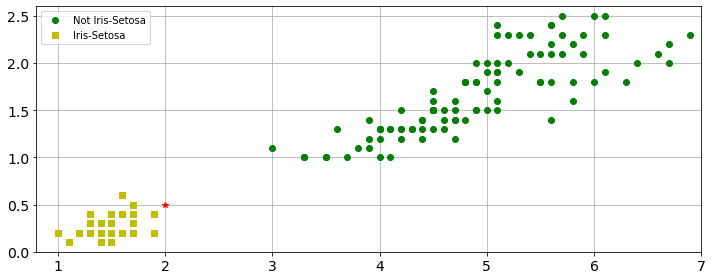

In [57]:
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(X[y==0,0],X[y==0,1],'go',label='Not Iris-Setosa')
ax.plot(X[y==1,0],X[y==1,1],'ys',label='Iris-Setosa')
ax.plot(2,0.5,'r*')
ax.grid(True)
ax.axis([0.8,7,0.0,2.6])
ax.legend()
save_fig('Iris-Setosa_Non Iris-Setosa')
plt.show()

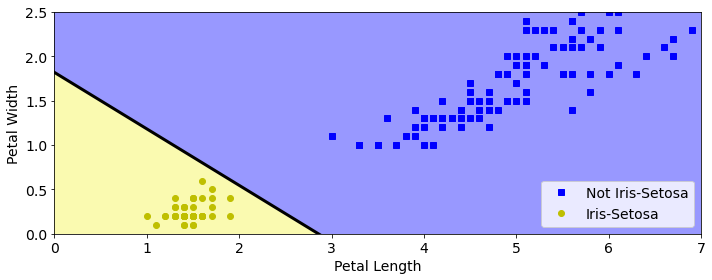

In [98]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

a=-per_clf.coef_[0][0]/per_clf.coef_[0][1]
b=-per_clf.intercept_/per_clf.coef_[0][1]

axes=[0,7,0,2.5]
x0,x1=np.meshgrid(np.linspace(axes[0],axes[1],500).reshape(-1,1),
                 np.linspace(axes[2],axes[3],200).reshape(-1,1))

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs',label='Not Iris-Setosa')
plt.plot(X[y==1,0],X[y==1,1],'yo',label='Iris-Setosa')
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

X_new=np.c_[x0.ravel(),x1.ravel()]
y_predict=per_clf.predict(X_new)
zz=y_predict.reshape(x0.shape)
plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.legend(loc='lower right',fontsize=14)
plt.xlabel('Petal Length',fontsize=14)
plt.ylabel('Petal Width',fontsize=14)
plt.axis(axes)
save_fig('perceptron_iris_plot')
plt.show()

## Activation Function

In [101]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivation(z,f,eps=0.000001):
    return (f(z+eps)-f(z-eps))/(2*eps)  

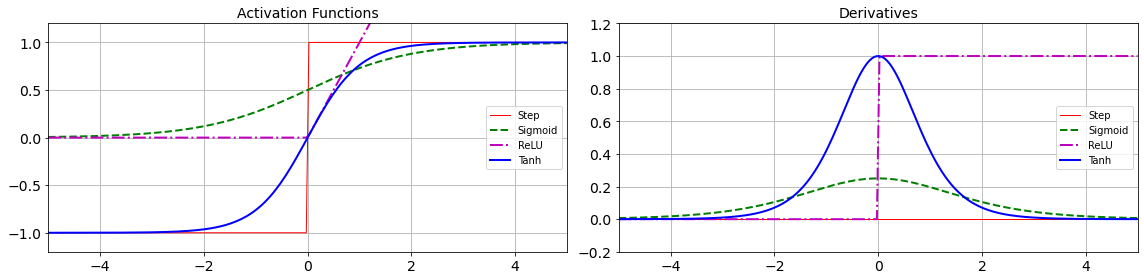

In [126]:
z=np.linspace(-5,5,200)
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(z,np.sign(z),"r-",linewidth=1,label='Step')
plt.plot(z,sigmoid(z),"g--",linewidth=2,label='Sigmoid')
plt.plot(z,relu(z),"m-.",linewidth=2,label='ReLU')
plt.plot(z,np.tanh(z),'b-',linewidth=2,label='Tanh')
plt.legend(loc='center right')
plt.title('Activation Functions',fontsize=14)
plt.grid(True)
plt.axis([-5,5,-1.2,1.2])

plt.subplot(122)
plt.plot(z,derivation(z,np.sign),'r-',linewidth=1,label='Step')
plt.plot(z,derivation(z,sigmoid),'g--',linewidth=2,label='Sigmoid')
plt.plot(z,derivation(z,relu),'m-.',linewidth=2,label='ReLU')
plt.plot(z,derivation(z,np.tanh),'b-',linewidth=2,label='Tanh')
plt.axis([-5,5,-0.2,1.2])
plt.title('Derivatives',fontsize=14)
plt.legend(loc='center right')
plt.grid(True)
save_fig('Activation_functions_plot')
plt.show()

In [127]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

Text(0.5, 1.0, 'Activation function: sigmoid')

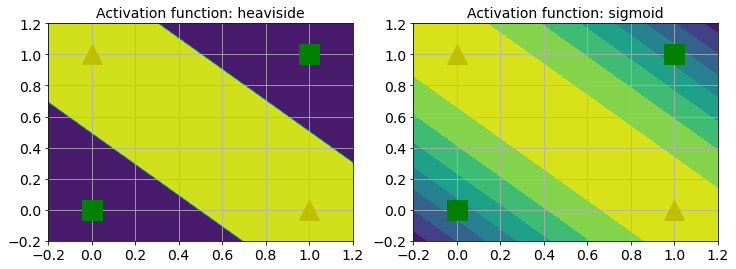

In [139]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.contourf(x1,x2,z1)
plt.plot([0,1],[0,1],'gs',markersize=20)
plt.plot([0,1],[1,0],'y^',markersize=20)
plt.grid(True)
plt.title('Activation function: heaviside',fontsize=14)

plt.subplot(122)
plt.contourf(x1,x2,z2)
plt.plot([0,1],[0,1],'gs',markersize=20)
plt.plot([0,1],[1,0],'y^',markersize=20)
plt.grid(True)
plt.title('Activation function: sigmoid',fontsize=14)

In [338]:
z1

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.]])

In [344]:
heaviside(x1+x2-1.5)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [345]:
heaviside(x1+x2-0.5)

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

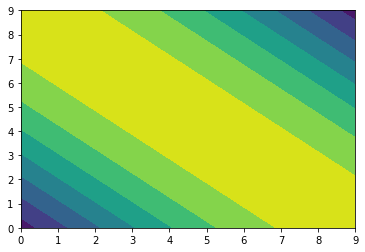

In [350]:
plt.contourf(mlp_xor(x1, x2, activation=sigmoid))

In [348]:
heaviside(heaviside(x1+x2-0.5)-heaviside(x1+x2-1.5)-.5)

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.]])

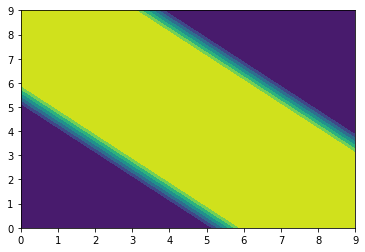

In [347]:
plt.contourf(heaviside(heaviside(x1+x2-0.5)-heaviside(x1+x2-1.5)-.5))

In [339]:
x1

array([[-0.2       , -0.04444444,  0.11111111,  0.26666667,  0.42222222,
         0.57777778,  0.73333333,  0.88888889,  1.04444444,  1.2       ],
       [-0.2       , -0.04444444,  0.11111111,  0.26666667,  0.42222222,
         0.57777778,  0.73333333,  0.88888889,  1.04444444,  1.2       ],
       [-0.2       , -0.04444444,  0.11111111,  0.26666667,  0.42222222,
         0.57777778,  0.73333333,  0.88888889,  1.04444444,  1.2       ],
       [-0.2       , -0.04444444,  0.11111111,  0.26666667,  0.42222222,
         0.57777778,  0.73333333,  0.88888889,  1.04444444,  1.2       ],
       [-0.2       , -0.04444444,  0.11111111,  0.26666667,  0.42222222,
         0.57777778,  0.73333333,  0.88888889,  1.04444444,  1.2       ],
       [-0.2       , -0.04444444,  0.11111111,  0.26666667,  0.42222222,
         0.57777778,  0.73333333,  0.88888889,  1.04444444,  1.2       ],
       [-0.2       , -0.04444444,  0.11111111,  0.26666667,  0.42222222,
         0.57777778,  0.73333333,  0.88888889

In [340]:
x2

array([[-0.2       , -0.2       , -0.2       , -0.2       , -0.2       ,
        -0.2       , -0.2       , -0.2       , -0.2       , -0.2       ],
       [-0.04444444, -0.04444444, -0.04444444, -0.04444444, -0.04444444,
        -0.04444444, -0.04444444, -0.04444444, -0.04444444, -0.04444444],
       [ 0.11111111,  0.11111111,  0.11111111,  0.11111111,  0.11111111,
         0.11111111,  0.11111111,  0.11111111,  0.11111111,  0.11111111],
       [ 0.26666667,  0.26666667,  0.26666667,  0.26666667,  0.26666667,
         0.26666667,  0.26666667,  0.26666667,  0.26666667,  0.26666667],
       [ 0.42222222,  0.42222222,  0.42222222,  0.42222222,  0.42222222,
         0.42222222,  0.42222222,  0.42222222,  0.42222222,  0.42222222],
       [ 0.57777778,  0.57777778,  0.57777778,  0.57777778,  0.57777778,
         0.57777778,  0.57777778,  0.57777778,  0.57777778,  0.57777778],
       [ 0.73333333,  0.73333333,  0.73333333,  0.73333333,  0.73333333,
         0.73333333,  0.73333333,  0.73333333

In [311]:
x1,x2=np.meshgrid(x1s,x2s)

In [324]:
x1s=['x11','x21','x31','x41']
y1s=['y11','y21','y31']
x1,x2=np.meshgrid(x1s,y1s)

In [325]:
x1

array([['x11', 'x21', 'x31', 'x41'],
       ['x11', 'x21', 'x31', 'x41'],
       ['x11', 'x21', 'x31', 'x41']], dtype='<U3')

In [313]:
x1.shape

(100, 100)

In [323]:
x2

array([['y11', 'y11', 'y11', 'y11'],
       ['y21', 'y21', 'y21', 'y21'],
       ['y31', 'y31', 'y31', 'y31'],
       ['y41', 'y41', 'y41', 'y41']], dtype='<U3')

In [315]:
x1+x2

array([[-0.4       , -0.38585859, -0.37171717, ...,  0.97171717,
         0.98585859,  1.        ],
       [-0.38585859, -0.37171717, -0.35757576, ...,  0.98585859,
         1.        ,  1.01414141],
       [-0.37171717, -0.35757576, -0.34343434, ...,  1.        ,
         1.01414141,  1.02828283],
       ...,
       [ 0.97171717,  0.98585859,  1.        , ...,  2.34343434,
         2.35757576,  2.37171717],
       [ 0.98585859,  1.        ,  1.01414141, ...,  2.35757576,
         2.37171717,  2.38585859],
       [ 1.        ,  1.01414141,  1.02828283, ...,  2.37171717,
         2.38585859,  2.4       ]])

In [316]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

In [317]:
t=heaviside(x1+x2)

In [319]:
t.shape

(100, 100)

In [318]:
t

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [309]:
x1s

array([-0.2       , -0.18585859, -0.17171717, -0.15757576, -0.14343434,
       -0.12929293, -0.11515152, -0.1010101 , -0.08686869, -0.07272727,
       -0.05858586, -0.04444444, -0.03030303, -0.01616162, -0.0020202 ,
        0.01212121,  0.02626263,  0.04040404,  0.05454545,  0.06868687,
        0.08282828,  0.0969697 ,  0.11111111,  0.12525253,  0.13939394,
        0.15353535,  0.16767677,  0.18181818,  0.1959596 ,  0.21010101,
        0.22424242,  0.23838384,  0.25252525,  0.26666667,  0.28080808,
        0.29494949,  0.30909091,  0.32323232,  0.33737374,  0.35151515,
        0.36565657,  0.37979798,  0.39393939,  0.40808081,  0.42222222,
        0.43636364,  0.45050505,  0.46464646,  0.47878788,  0.49292929,
        0.50707071,  0.52121212,  0.53535354,  0.54949495,  0.56363636,
        0.57777778,  0.59191919,  0.60606061,  0.62020202,  0.63434343,
        0.64848485,  0.66262626,  0.67676768,  0.69090909,  0.70505051,
        0.71919192,  0.73333333,  0.74747475,  0.76161616,  0.77

In [310]:
x2s

array([-0.2       , -0.18585859, -0.17171717, -0.15757576, -0.14343434,
       -0.12929293, -0.11515152, -0.1010101 , -0.08686869, -0.07272727,
       -0.05858586, -0.04444444, -0.03030303, -0.01616162, -0.0020202 ,
        0.01212121,  0.02626263,  0.04040404,  0.05454545,  0.06868687,
        0.08282828,  0.0969697 ,  0.11111111,  0.12525253,  0.13939394,
        0.15353535,  0.16767677,  0.18181818,  0.1959596 ,  0.21010101,
        0.22424242,  0.23838384,  0.25252525,  0.26666667,  0.28080808,
        0.29494949,  0.30909091,  0.32323232,  0.33737374,  0.35151515,
        0.36565657,  0.37979798,  0.39393939,  0.40808081,  0.42222222,
        0.43636364,  0.45050505,  0.46464646,  0.47878788,  0.49292929,
        0.50707071,  0.52121212,  0.53535354,  0.54949495,  0.56363636,
        0.57777778,  0.59191919,  0.60606061,  0.62020202,  0.63434343,
        0.64848485,  0.66262626,  0.67676768,  0.69090909,  0.70505051,
        0.71919192,  0.73333333,  0.74747475,  0.76161616,  0.77

In [305]:
(X_train_full,y_train_full),(X_test,y_test)=load_data()

In [306]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [307]:
X_train,X_valid=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_train,y_valid=y_train_full[:5000],y_train_full[5000:]

In [148]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [149]:
class_names[y_train[0]]

'Ankle boot'

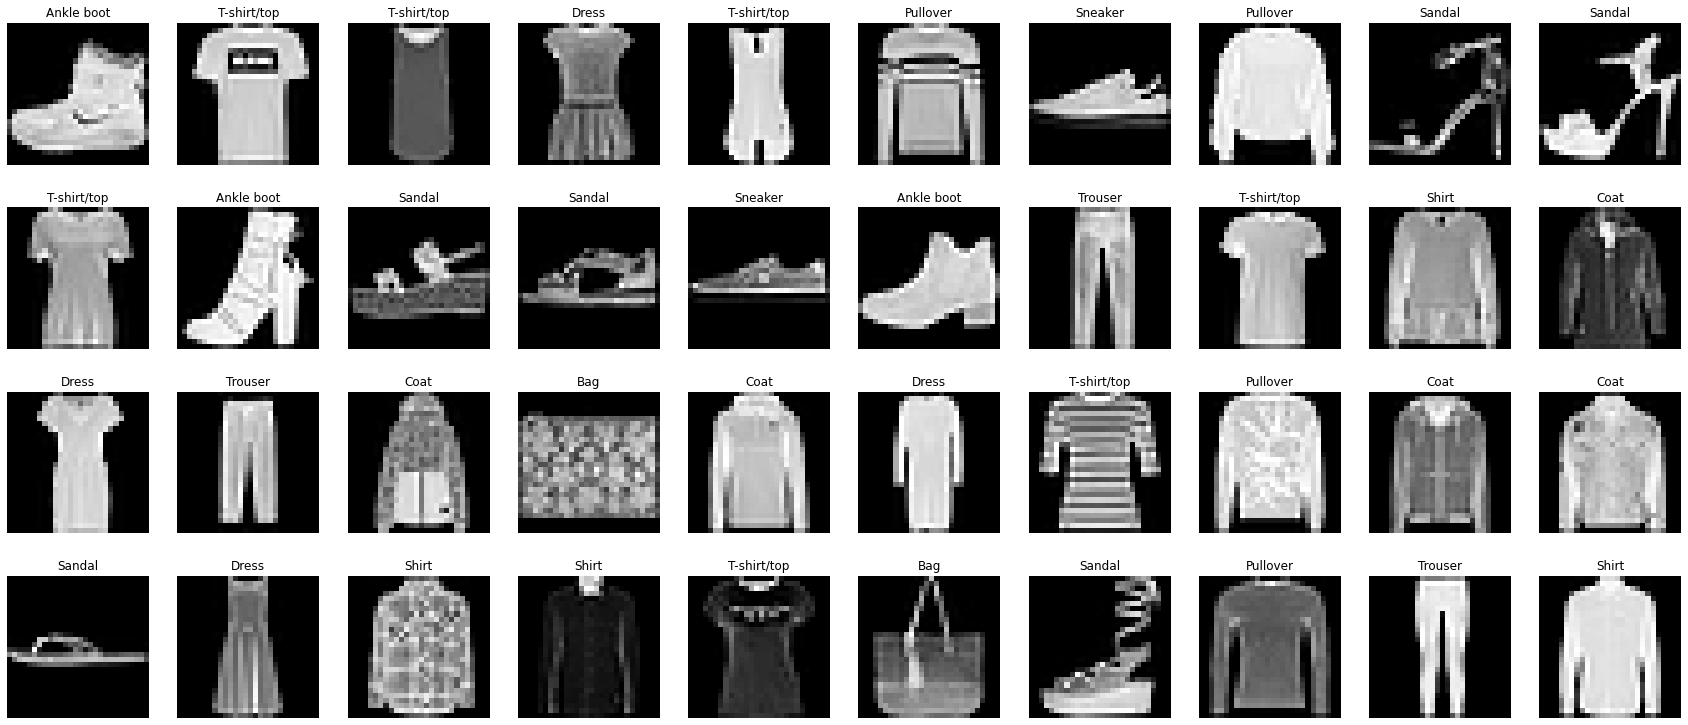

In [353]:
fig,ax=plt.subplots(4,10,figsize=(30,13))
for i,img in enumerate(X_train_full[:40]):
    x=int(i/10)
    y=int(i%10)
    ax[x,y].set_title(class_names[y_train_full[i]])
    ax[x,y].imshow(img,cmap=plt.cm.gray)
    ax[x,y].axis('off')

In [151]:
models=keras.models.Sequential()
models.add(keras.layers.Flatten(input_shape=[28,28]))
models.add(keras.layers.Dense(300,activation='relu'))
models.add(keras.layers.Dense(100,activation='relu'))
models.add(keras.layers.Dense(10,activation='softmax'))

In [152]:
models.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


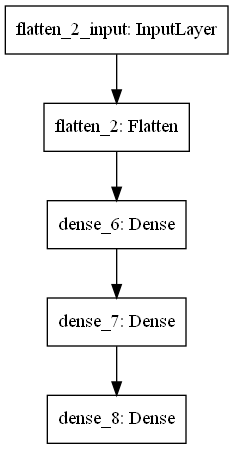

In [153]:
keras.utils.plot_model(models)

In [154]:
models.layers

In [155]:
# 获取网络中的第一层，并保存到hidden1中
hidden1=models.layers[1]
print(hidden1.name)

dense_6


In [158]:
models.get_layer('dense_6') is hidden1

True

In [159]:
# 利用get_weights()和set_weights()的方法，获取每层中的权值和偏置
weights,bias=hidden1.get_weights()

In [160]:
weights

array([[ 0.06275244,  0.02452411, -0.04966377, ...,  0.06140028,
        -0.05488418,  0.02066921],
       [ 0.00926104,  0.06936125,  0.03312457, ..., -0.03299809,
         0.06962536,  0.04545254],
       [ 0.05218635,  0.00019833,  0.00490652, ...,  0.01340347,
        -0.0066487 ,  0.06908385],
       ...,
       [-0.03810419, -0.0662493 ,  0.0564518 , ..., -0.04124479,
        -0.03671611,  0.01412414],
       [ 0.04552708, -0.01634683, -0.03754041, ...,  0.0388498 ,
        -0.01938893, -0.0020562 ],
       [ 0.01992296, -0.04309722,  0.04024833, ..., -0.01482531,
        -0.05690758,  0.00248917]], dtype=float32)

In [161]:
weights.shape

(784, 300)

In [162]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [163]:
bias.shape

(300,)

In [164]:
models.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [165]:
# models.compile(loss=keras.losses.SparseCategoricalCrossentropy,
#               optimizer=keras.optimizers.SGD(lr=0.001),
#               metrics=[keras.metrics.sparse_categorical_accuracy])

In [166]:
history=models.fit(X_train,
                  y_train,
                  epochs=30,
                  validation_data=(X_valid,
                                  y_valid))

Epoch 1/30
157/157 [==============================] - 1s 9ms/step - loss: 1.4720 - accuracy: 0.5654 - val_loss: 1.0592 - val_accuracy: 0.6565
Epoch 2/30
157/157 [==============================] - 1s 8ms/step - loss: 0.8841 - accuracy: 0.7196 - val_loss: 0.8125 - val_accuracy: 0.7368
Epoch 3/30
157/157 [==============================] - 1s 8ms/step - loss: 0.7372 - accuracy: 0.7554 - val_loss: 0.7555 - val_accuracy: 0.7398
Epoch 4/30
157/157 [==============================] - 1s 8ms/step - loss: 0.6605 - accuracy: 0.7802 - val_loss: 0.7109 - val_accuracy: 0.7534
Epoch 5/30
157/157 [==============================] - 1s 8ms/step - loss: 0.6114 - accuracy: 0.7974 - val_loss: 0.6496 - val_accuracy: 0.7781
Epoch 6/30
157/157 [==============================] - 1s 8ms/step - loss: 0.5767 - accuracy: 0.8092 - val_loss: 0.5963 - val_accuracy: 0.7996
Epoch 7/30
157/157 [==============================] - 1s 8ms/step - loss: 0.5462 - accuracy: 0.8178 - val_loss: 0.6229 - val_accuracy: 0.7824
Epoch 

In [167]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 157}

In [168]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [169]:
history.history['accuracy'][-1]

0.8885999917984009

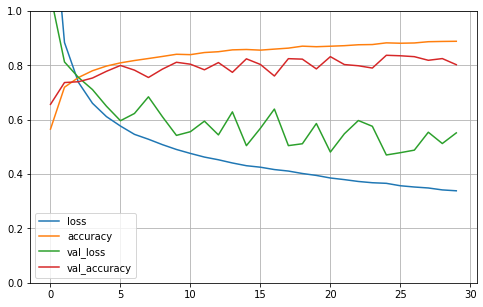

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [178]:
models.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 115.0116 - accuracy: 0.7645


[115.0115966796875, 0.7645000219345093]

In [179]:
X_new=X_test[:3]
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [186]:
y_proba=models.predict(X_new)

In [187]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [188]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [189]:
y_pred=models.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [193]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a Regression MLP Using the Sequential API

In [195]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [200]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

In [206]:
print('training dataset shape',X_train.shape)
print('testing dataset shape',X_test.shape)
print('validating dataset shape',X_valid.shape)

training dataset shape (11610, 8)
testing dataset shape (5160, 8)
validating dataset shape (3870, 8)


In [212]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [216]:
model=keras.models.Sequential([
    keras.layers.Dense(30,
                       activation='relu',
                       input_shape=X_train.shape[1:]
                      ),
    keras.layers.Dense(1)
])

In [217]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
             )

In [228]:
history=model.fit(X_train,
                     y_train,
                     epochs=20,
                     validation_data=(X_valid,
                                     y_valid)
                    )

Epoch 1/20
363/363 [==============================] - 0s 738us/step - loss: 0.3512 - val_loss: 0.3579
Epoch 2/20
363/363 [==============================] - 0s 694us/step - loss: 0.3501 - val_loss: 0.3489
Epoch 3/20
363/363 [==============================] - 0s 691us/step - loss: 0.3478 - val_loss: 0.3469
Epoch 4/20
363/363 [==============================] - 0s 691us/step - loss: 0.3493 - val_loss: 0.3463
Epoch 5/20
363/363 [==============================] - 0s 650us/step - loss: 0.4548 - val_loss: 0.3970
Epoch 6/20
363/363 [==============================] - 0s 694us/step - loss: 0.3757 - val_loss: 0.3769
Epoch 7/20
363/363 [==============================] - 0s 705us/step - loss: 0.3588 - val_loss: 0.3599
Epoch 8/20
363/363 [==============================] - 0s 675us/step - loss: 0.3556 - val_loss: 0.3543
Epoch 9/20
363/363 [==============================] - 0s 658us/step - loss: 0.3522 - val_loss: 0.3578
Epoch 10/20
363/363 [==============================] - 0s 700us/step - loss: 0.349

In [222]:
mse_test=model.evaluate(X_test,y_test)
print(mse_test)

162/162 [==============================] - 0s 543us/step - loss: 0.3646
0.36464592814445496


In [224]:
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_pred)

[[0.6345771]
 [2.9270654]
 [5.4965696]]


## Building Complex Models Using the Functional API

In [234]:
input_A=keras.layers.Input(shape=[5],
                           name='wide_input')
input_B=keras.layers.Input(shape=[6],
                          name='deep_input')
hidden1=keras.layers.Dense(30,
                           activation='relu',
                           name='hidden1'
                          )(input_B)
hidden2=keras.layers.Dense(30,
                           activation='relu',
                           name='hidden2'
                          )(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name='output')(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [235]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 30)           930         hidden1[0][0]                    
_______________________________________________________________________________________

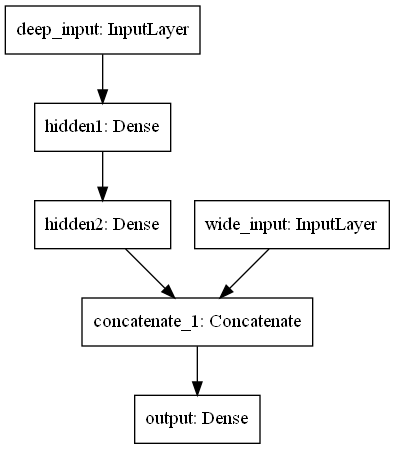

In [236]:
keras.utils.plot_model(model)

In [240]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]

In [241]:
history=model.fit((X_train_A,X_train_B),
                  y_train,
                  epochs=20,
                  validation_data=((X_valid_A,X_valid_B),y_valid),
                 )

Epoch 1/20
363/363 [==============================] - 0s 975us/step - loss: 1.9424 - val_loss: 0.8676
Epoch 2/20
363/363 [==============================] - 0s 766us/step - loss: 0.7558 - val_loss: 0.6766
Epoch 3/20
363/363 [==============================] - 0s 741us/step - loss: 0.6465 - val_loss: 0.6112
Epoch 4/20
363/363 [==============================] - 0s 738us/step - loss: 0.5988 - val_loss: 0.5777
Epoch 5/20
363/363 [==============================] - 0s 719us/step - loss: 0.5695 - val_loss: 0.5552
Epoch 6/20
363/363 [==============================] - 0s 719us/step - loss: 0.5487 - val_loss: 0.5406
Epoch 7/20
363/363 [==============================] - 0s 758us/step - loss: 0.5340 - val_loss: 0.5285
Epoch 8/20
363/363 [==============================] - 0s 752us/step - loss: 0.5232 - val_loss: 0.5186
Epoch 9/20
363/363 [==============================] - 0s 741us/step - loss: 0.5148 - val_loss: 0.5139
Epoch 10/20
363/363 [==============================] - 0s 746us/step - loss: 0.509

In [242]:
mse_test=model.evaluate((X_test_A,X_test_B),y_test)

162/162 [==============================] - 0s 642us/step - loss: 0.4661


In [244]:
y_pred=model.predict((X_new_A,X_new_B))
print(y_pred)

[[0.53630745]
 [2.8088832 ]
 [5.705917  ]]


In [245]:
y_test[:3]

array([0.696  , 3.356  , 5.00001])

In [272]:
# 增加一个auxiliary layer for auxiliary output
input_A=keras.layers.Input(shape=[5],name='Input_A')
input_B=keras.layers.Input(shape=[6],name='Input_B')

hidden1=keras.layers.Dense(30,
                           activation='relu',
                           name='Hidden1'
                          )(input_B)
hidden2=keras.layers.Dense(30,
                           activation='relu',
                           name='Hidden2'
                          )(hidden1)
concat=keras.layers.concatenate([input_A,hidden2],
                               name='Concatenate')
output=keras.layers.Dense(1,
                          name='Main_output'
                         )(concat)
aux_output=keras.layers.Dense(1,name='Aux_output')(hidden2)
model=keras.models.Model(inputs=[input_A,input_B],
                 outputs=[output,aux_output])

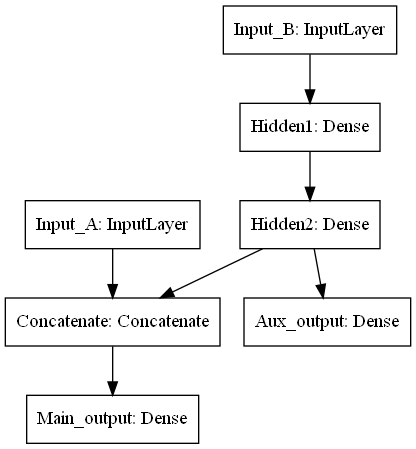

In [273]:
keras.utils.plot_model(model)

In [274]:
model.compile(loss=['mse','mse'],
              loss_weights=[0.9,0.1],
              optimizer='sgd'
             )

In [275]:
model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_B (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
Hidden1 (Dense)                 (None, 30)           210         Input_B[0][0]                    
__________________________________________________________________________________________________
Input_A (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
Hidden2 (Dense)                 (None, 30)           930         Hidden1[0][0]                    
______________________________________________________________________________________

In [282]:
history=model.fit(([X_train_A,X_train_B]),
                  [y_train,y_train],
                  epochs=20,
                  validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid])
                 )

Epoch 1/20
363/363 [==============================] - 0s 997us/step - loss: 0.3853 - Main_output_loss: 0.3693 - Aux_output_loss: 0.5299 - val_loss: 0.3740 - val_Main_output_loss: 0.3578 - val_Aux_output_loss: 0.5207
Epoch 2/20
363/363 [==============================] - 0s 837us/step - loss: 0.3824 - Main_output_loss: 0.3668 - Aux_output_loss: 0.5221 - val_loss: 0.3769 - val_Main_output_loss: 0.3616 - val_Aux_output_loss: 0.5149
Epoch 3/20
363/363 [==============================] - 0s 879us/step - loss: 0.3810 - Main_output_loss: 0.3660 - Aux_output_loss: 0.5165 - val_loss: 0.3801 - val_Main_output_loss: 0.3639 - val_Aux_output_loss: 0.5257
Epoch 4/20
363/363 [==============================] - 0s 884us/step - loss: 0.3750 - Main_output_loss: 0.3600 - Aux_output_loss: 0.5099 - val_loss: 0.3617 - val_Main_output_loss: 0.3466 - val_Aux_output_loss: 0.4977
Epoch 5/20
363/363 [==============================] - 0s 913us/step - loss: 0.3820 - Main_output_loss: 0.3677 - Aux_output_loss: 0.5104 

In [283]:
total_loss,main_loss,aux_loss=model.evaluate([X_test_A,X_test_B],[y_test,y_test])
print('total_loss',total_loss)
print('main_loss',main_loss)
print('aux_loss',aux_loss)

162/162 [==============================] - 0s 580us/step - loss: 0.3319 - Main_output_loss: 0.3203 - Aux_output_loss: 0.4356
total_loss 0.33185553550720215
main_loss 0.3203335702419281
aux_loss 0.43555349111557007


In [284]:
y_pred_main,y_pred_aux=model.predict([X_new_A,X_new_B])
print('y_pred_main',y_pred_main)
print('y_pred_aux',y_pred_aux)

y_pred_main [[0.6886047]
 [2.8693285]
 [5.7128663]]
y_pred_aux [[0.981796 ]
 [3.258614 ]
 [4.0391917]]


In [288]:
hidden1.get_shape()

TensorShape([None, 30])

In [289]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [297]:
model.call([keras.layers.Input(shape=[5],name='Input1'),
            keras.layers.Input(shape=[6],name='Input2')
           ])

(<tf.Tensor 'dense_18/BiasAdd_2:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'dense_19/BiasAdd_2:0' shape=(None, 1) dtype=float32>)

In [300]:
import os
os.curdir

'.'

In [302]:
%load_ext tensorboard
%tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2021-09-04 10:40:37.559071: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.